In [286]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa

In [287]:
# read data into memory
data_set = np.genfromtxt("hw08_data_set.csv", delimiter = ",")

Text(0, 0.5, '$x_2$')

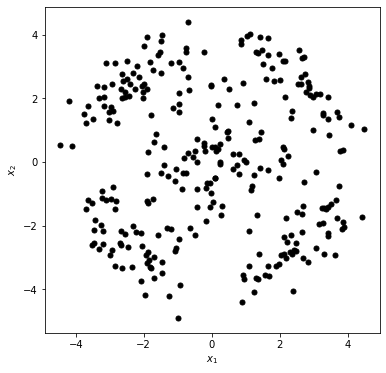

In [288]:
plt.figure(figsize=(6,6))
plt.plot(data_set[:,0], data_set[:,1], ".", markersize = 10, color = "black")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [289]:
# define variables
N = data_set.shape[0]
threshold = 1.25
R = 5
K = 5

In [290]:
# construct b matrix
b = np.array([])
for i in data_set:
    for j in data_set:
        if np.alltrue(i == j):
            b = np.append(b, 0).astype(int)
        elif np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2) < threshold:
            b = np.append(b, 1).astype(int)
        else:
            b = np.append(b, 0).astype(int)
            
b = b.reshape((N, N))

Text(0, 0.5, '$x_2$')

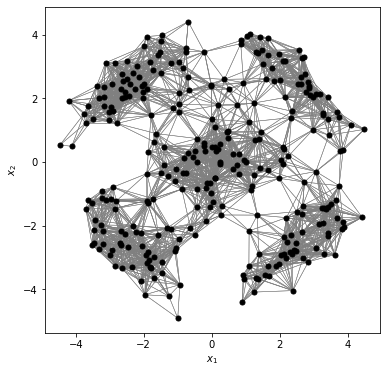

In [291]:
# plot the connections between each data point
plt.figure(figsize=(6,6))
for i in range(N):
    for j in range(N):
        if b[i,j] == 1:
            plt.plot([data_set[i][0], data_set[j][0]], [data_set[i][1], data_set[j][1]], "grey", linewidth=0.5)

plt.plot(data_set[:,0], data_set[:,1], ".", markersize = 10, color = "black")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [292]:
# construct D matrix
D = np.array([])
for i in range(N):
    for j in range(N):
        if i == j:
            D = np.append(D, np.count_nonzero(b, axis=1)[i]).astype(int)
        else:
            D = np.append(D, 0).astype(int)
D = D.reshape((N, N))

In [293]:
# calculate laplacian matrix
L = D-b

In [294]:
# calculate the normalized laplacian matrix
I = np.identity(N)
L_sym = I - np.matmul(np.sqrt(np.linalg.inv(D)), np.matmul(b, np.sqrt(np.linalg.inv(D))))

In [295]:
eigen_values, eigen_vectors = np.linalg.eig(L_sym)

In [296]:
sorted_indices = np.argsort(eigen_values)[1:(R+1)]

In [297]:
Z = eigen_vectors[:, sorted_indices]

In [298]:
initial_centroids = Z[[28, 142, 203, 270, 276], :]

In [299]:
np.random.seed(421)

In [300]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K, False),]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

In [319]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

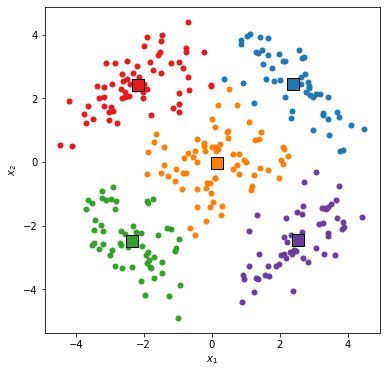

In [326]:
centroids_Z = initial_centroids
centroids_X = None
memberships = None

while True:
    
    old_memberships = memberships
    memberships = update_memberships(centroids_Z, Z)

    old_centroids_Z = centroids_Z
    centroids_Z = update_centroids(memberships, Z)

    old_centroids_X = centroids_X
    centroids_X = update_centroids(memberships, data_set)
    
    if np.alltrue(centroids_Z == old_centroids_Z):
        plt.figure(figsize=(6,6))
        plot_current_state(centroids_X, memberships, data_set)
        break

    if np.alltrue(memberships == old_memberships):
        plt.figure(figsize=(6,6))
        plot_current_state(centroids_X, memberships, data_set)
        break
